**Сбербанк, Работа с данными на Python. Толстиков Валентин**

### Упражнение 1

* Скачайте с портала Открытых Данных производственный календарь России: https://data.gov.ru/opendata/7708660670-proizvcalendar
* На его основе определите соответствующий календарь в Pandas: `RussianBusinessCalendar(AbstractHolidayCalendar)`
* С помощью полученного в пункте выше календаря и модуля `pd.offsets` создайте DataFrame one-hot календарных признаков:
    * День недели
    * Месяц
    * Выходной день
    * Праздничный день
    * Предпраздничный рабочий день
    * Последний день месяца
    * Последний рабочий день месяца
    * Предновогодний выходной день

In [1]:
# пример требуемого DataFrame 
events

,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца,пн,вт,ср,чт,пт,сб,вс,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,Предновогодний выходной день
2014-01-01,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-02,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-03,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-04,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-05,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday
from itertools import product
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 60)
path = './data/time_series/calendar.csv'
pd.read_csv(path)

,Год/Месяц,Январь,Февраль,Март,Апрель,Май,Июнь,Июль,Август,Сентябрь,Октябрь,Ноябрь,Декабрь,Всего рабочих дней,Всего праздничных и выходных дней,Количество рабочих часов при 40-часовой рабочей неделе,Количество рабочих часов при 36-часовой рабочей неделе,Количество рабочих часов при 24-часовой рабочей неделе
0,1999,"1,2,3,4,6*,7,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*",251,114,2004,1807.2,1204.8
1,2000,"1,2,3,4,6*,7,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,2,6,7,8*,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,7,11,12,18,19,25,26","2,3,9,10,11*,12,16,17,23,24,30,31",250,116,1995,1800.0,1200.0
2,2001,"1,2,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29,30*","1,2,5,6,8*,9,12,13,19,20,26,27","2,3,9,10,11*,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,6*,7,10,11,17,18,24,25","1,2,8,9,12,15,16,22,23,29,30",251,114,2001,1807.2,1204.8
3,2002,"1,2,5,6,7,12,13,19,20,26,27","2,3,9,10,16,17,22*,23,24,25","2,3,7*,8,9,10,16,17,23,24,30,31","6,7,13,14,20,21,28,30*","1,2,3,4,5,8*,9,10,11,12,19,25,26","1,2,8,9,11*,12,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","5,6,12,13,19,20,26,27","2,3,6*,7,8,9,16,17,23,24,30","1,7,8,11*,12,13,14,21,22,28,29,31*",250,115,1992,1792.0,1192.0
4,2003,"1,2,3,5*,6,7,11,12,18,19,25,26","1,2,8,9,15,16,22,23,24","1,2,7*,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,26,27,30*","1,2,3,4,8*,9,10,11,17,18,24,25,31","1,7,8,11*,12,13,14,15,22,28,29","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","4,5,11,12,18,19,25,26","1,2,6*,7,8,9,15,16,22,23,29,30","6,7,11*,12,13,14,20,21,27,28,31*",250,115,1992,1792.0,1192.0
5,2004,"1,2,3,4,6*,7,10,11,17,18,24,25,31","1,7,8,14,15,21,22,23,28,29","6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,24,25,30*","1,2,3,4,8,9,10,15,16,22,23,29,30","5,6,11*,12,13,14,19,20,26,27","3,4,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,8,13,14,20,21,27,28","4,5,11,12,13,18,19,25,26,31*",251,115,2004,1803.2,1200.8
6,2005,"1,2,3,4,5,6,7,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,22*,23,26,27","5*,6,7,8,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,2,7,8,9,14,15,21,22,28,29","4,5,11,12,13,18,19,25,26","2,3,9,10,16,17,23,24,30,31","6,7,13,14,20,21,27,28","3,4,10,11,17,18,24,25","1,2,8,9,15,16,22,23,29,30","3*,4,5,6,12,13,19,20,26,27","3,4,10,11,17,18,24,25,31",248,117,1981,1782.6,1187.4
7,2006,"1,2,3,4,5,6,7,8,9,14,15,21,22,28,29","4,5,11,12,18,19,22*,23,24,25","4,5,7*,8,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","1,6*,7,8,9,13,14,20,21,27,28","3,4,10,11,12,17,18,24,25","1,2,8,9,15,16,22,23,29,30","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23,24,30","1,7,8,14,15,21,22,28,29","3*,4,5,6,11,12,18,19,25,26","2,3,9,10,16,17,23,24,30,31",248,117,1981,1782.6,1187.4
8,2007,"1,2,3,4,5,6,7,8,13,14,20,21,27,28","3,4,10,11,17,18,22*,23,24,25","3,4,7*,8,10,11,17,18,24,25,31","1,7,8,14,15,21,22,28*,29,30","1,5,6,8*,9,12,13,19,20,26,27","2,3,9*,10,11,12,16,17,23,24,30","1,7,8,14,15,21,22,28,29","4,5,11,12,18,19,25,26","1,2,8,9,15,16,22,23,29,30","6,7,13,14,20,21,27,28","3,4,5,10,11,17,18,24,25","1,2,8,9,15,16,22,23,29*,30,31",249,116,1986,1786.8,1189.2
9,2008,"1,2,3,4,5,6,7,8,12,13,19,20,26,27","2,3,9,10,16,17,22*,23,24,25","1,2,7*,8,9,10,15,16,22,23,29,30","5,6,12,13,19,20,26,27,30*","1,2,3,8*,9,10,11,17,18,24,25,31","1,8,11*,12,13,14,15,21,22,28,29","5,6,12,13,19,20,26,27","2,3,9,10,16,17,23

In [3]:
# Нерабочие дни
data = pd.read_csv(path, header=0, names=['Year', *range(1, 13)], index_col=0,
                   usecols=[*range(0, 13)], skiprows=14, nrows=8)

data = data.stack()
data = data.str.replace(r'^\d{1,2}\*,|,\d{1,2}\*|\+', '', regex=True).str.split(',')

non_business_days = ['{}-{}-{}'.format(*ind, x) for ind in data.index for x in data[ind]]
non_business_days = pd.to_datetime(non_business_days)

In [4]:
# Праздничные дни
years = [str(i) for i in range(2013, 2021)]
holidays = (['-01-{}'.format(i) for i in range(1, 9)]
            + ['-02-23', '-03-08', '-05-01', '-05-09', '-06-12', '-11-04'])
holidays = pd.to_datetime([f'{y}{md}' for y in years for md in holidays])

In [5]:
class RussianBusinessCalendar(AbstractHolidayCalendar):
    start_date = pd.Timestamp('1999-01-01')
    end_date = pd.Timestamp('2025-12-31')
    rules = [Holiday(name='Non business days', year=date.year, month=date.month, day=date.day)
             for date in non_business_days]

# Т. к. с одной стороны у нас бывают рабочие субботы,
# а с другой - мы явно передаём в календарь все нерабочие дни,
# то для избежания коллизий установим weekmask='Mon Tue Wed Thu Fri Sat'
russian_busday = pd.offsets.CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri Sat',
                                              calendar=RussianBusinessCalendar())

In [6]:
days_of_week = ['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс']

months = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь',
          'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']

df_columns = ['выходной', 'праздник', 'предпраздничный рабочий день',
              'последний день месяца', 'последний рабочий день месяца',
              *days_of_week, *months, 'Предновогодний выходной день']

df_index = pd.date_range(start='2013-01-01', end='2020-12-31', freq='D')

oh_calendar = pd.DataFrame(0, index=df_index, columns=df_columns)

In [7]:
oh_calendar.loc[non_business_days, 'выходной'] = 1
oh_calendar.loc[holidays, 'праздник'] = 1

pre_holiday = oh_calendar.index[oh_calendar['праздник'] == 1] - russian_busday
pre_holiday = pre_holiday[pre_holiday.year > 2012]
oh_calendar.loc[pre_holiday, 'предпраздничный рабочий день'] = 1

month_ends = pd.date_range(start='2013-01-31', end='2020-12-31', freq='M')
oh_calendar.loc[month_ends, 'последний день месяца'] = 1

last_busday_of_month = pd.DatetimeIndex(month_ends - russian_busday * oh_calendar.loc[month_ends, 'выходной'])
oh_calendar.loc[last_busday_of_month, 'последний рабочий день месяца'] = 1

for i, day in enumerate(days_of_week):
    oh_calendar.loc[oh_calendar.index.dayofweek == i, day] = 1

for i, month in enumerate(months, 1):
    oh_calendar.loc[oh_calendar.index.month == i, month] = 1

last_nb_of_year = oh_calendar.index[(oh_calendar.index.month == 12) & (oh_calendar['выходной'] == 1)]
last_nb_of_year = pd.DataFrame({'date': last_nb_of_year}, index=last_nb_of_year).resample('1Y').max()
last_nb_of_year = pd.DatetimeIndex(last_nb_of_year['date'])
oh_calendar.loc[last_nb_of_year, 'Предновогодний выходной день'] = 1

In [8]:
oh_calendar.loc['2014':].head()

,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца,пн,вт,ср,чт,пт,сб,вс,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,Предновогодний выходной день
2014-01-01,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-02,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-03,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-04,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-01-05,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


### Упражнение 2

* Для временного ряда курса акций Сбербанка на основе производственного календаря России сформируйте DataFrame признаков:
    * Лаговые переменные рабочих дней с глубинами: 1, 3, 5
    * Скользящие статистики `['mean', 'median', 'max', 'min', 'std'] ` с окнами 1, 3, 5 сгрупированные по дням недели
    * Статистики `['mean', 'median', 'max', 'min', 'std'] ` в расширяющемся окне сгруппированные по рабочим, праздничным и предпраздничным дням

In [9]:
path = './data/time_series/sber_stocks.csv'
df = pd.read_csv(path, usecols=['CLOSE', 'TRADEDATE'], 
                 index_col='TRADEDATE', parse_dates=True)

df = df.asfreq('1D', method='ffill')
oh_calendar = oh_calendar.loc[df.index]

In [10]:
# Лаговые переменные рабочих дней с глубинами: 1, 3, 5

shift_step = [1, 3, 5]
for step in shift_step:
    shift_close = df.loc[oh_calendar['выходной'] == 0, ['CLOSE']].shift(step, freq=russian_busday)
    shift_close.rename(columns={'CLOSE': 'shift_work_{}'.format(step)}, inplace=True)
    df = df.merge(shift_close, on='TRADEDATE', how='left')

df.head(10)

,CLOSE,shift_work_1,shift_work_3,shift_work_5
TRADEDATE,,,,
2013-03-25,98.79,NaN,NaN,NaN
2013-03-26,97.20,98.79,NaN,NaN
2013-03-27,96.75,97.20,NaN,NaN
2013-03-28,98.59,96.75,98.79,NaN
2013-03-29,98.76,98.59,97.20,NaN
2013-03-30,98.76,NaN,NaN,NaN
2013-03-31,98.76,NaN,NaN,NaN
2013-04-01,98.07,98.76,96.75,98.79
2013-04-02,98.93,98.07,98.59,97.20


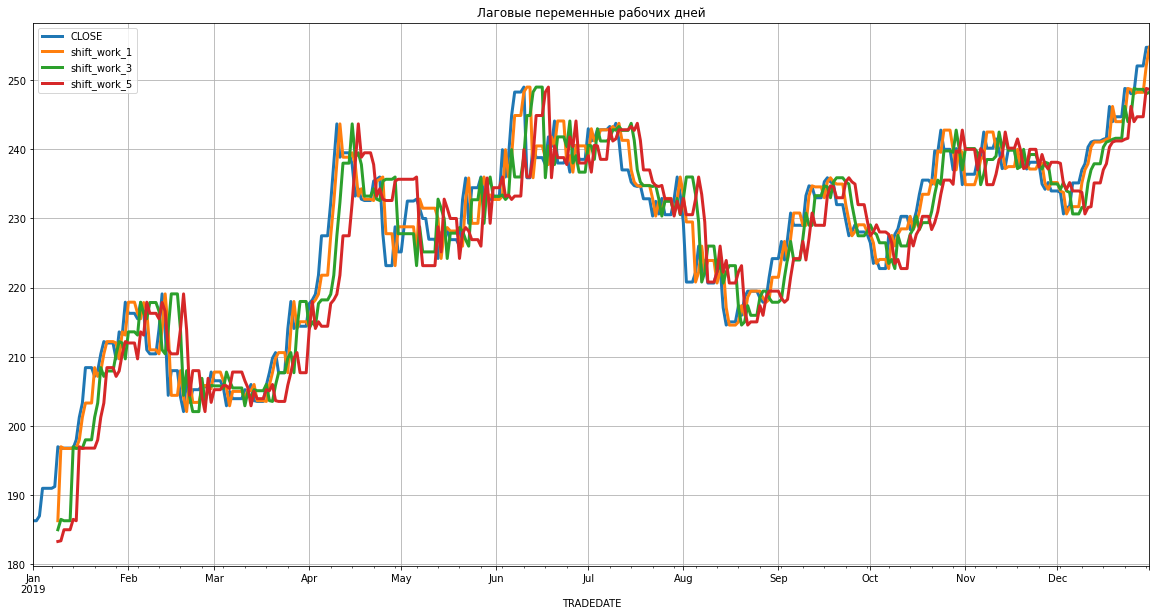

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
params = {'ax': ax, 'linewidth': 3}
interval = '2019'

df.loc[interval, 'CLOSE'].plot(**params)
df.loc[interval, 'shift_work_1'].fillna(method='ffill').plot(**params)
df.loc[interval, 'shift_work_3'].fillna(method='ffill').plot(**params)
df.loc[interval, 'shift_work_5'].fillna(method='ffill').plot(**params)
plt.grid(True)
plt.legend()
plt.title('Лаговые переменные рабочих дней')
plt.show()

In [12]:
# Скользящие статистики ['mean', 'median', 'max', 'min', 'std']
# с окнами 1, 3, 5, сгрупированные по дням недели

# Не совсем понял, что подразумевается под вычислением статистик для окна размера 1.
# Статистики ['mean', 'median', 'max', 'min'] для окна размера 1 будут в точности равны
# значению в этом окне, а 'std' будет не опрелено.
# Поэтому посчитал скользящие статистики только для размеров окон 3 и 5.
# Если статистики для окна размера 1 всё же нужны, то нужно использовать window_sizes = [1, 3, 5]

#window_sizes = [1, 3, 5]
window_sizes = [3, 5]
agg_func = ['mean', 'median', 'max', 'min', 'std']
gen_params = ((x, y) for x, y in product(window_sizes, agg_func))

for w, f in gen_params:
    rol_stat = df[['CLOSE']].groupby(df.index.weekday).transform(lambda x: x.rolling(window=w).agg(f))
    rol_stat.rename(columns={'CLOSE': 'rol_wind_{}_{}'.format(w, f)}, inplace=True)
    df = df.merge(rol_stat, on='TRADEDATE', how='left')

df.head(30)

,CLOSE,shift_work_1,shift_work_3,shift_work_5,rol_wind_3_mean,rol_wind_3_median,rol_wind_3_max,rol_wind_3_min,rol_wind_3_std,rol_wind_5_mean,rol_wind_5_median,rol_wind_5_max,rol_wind_5_min,rol_wind_5_std
TRADEDATE,,,,,,,,,,,,,,
2013-03-25,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-26,97.20,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-27,96.75,97.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-28,98.59,96.75,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-29,98.76,98.59,97.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-30,98.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,98.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-01,98.07,98.76,96.75,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-02,98.93,98.07,98.59,97.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


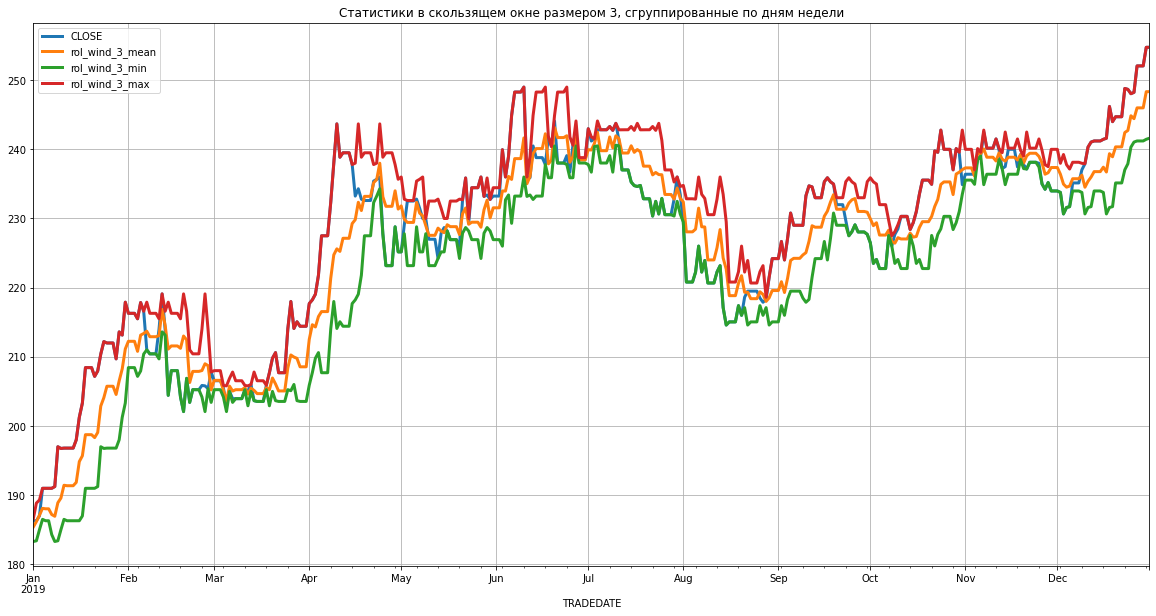

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
params = {'ax': ax, 'linewidth': 3}
interval = '2019'

df.loc[interval, 'CLOSE'].plot(**params)
df.loc[interval, 'rol_wind_3_mean'].plot(**params)
df.loc[interval, 'rol_wind_3_min'].plot(**params)
df.loc[interval, 'rol_wind_3_max'].plot(**params)
plt.grid(True)
plt.legend()
plt.title('Статистики в скользящем окне размером 3, сгруппированные по дням недели')
plt.show()

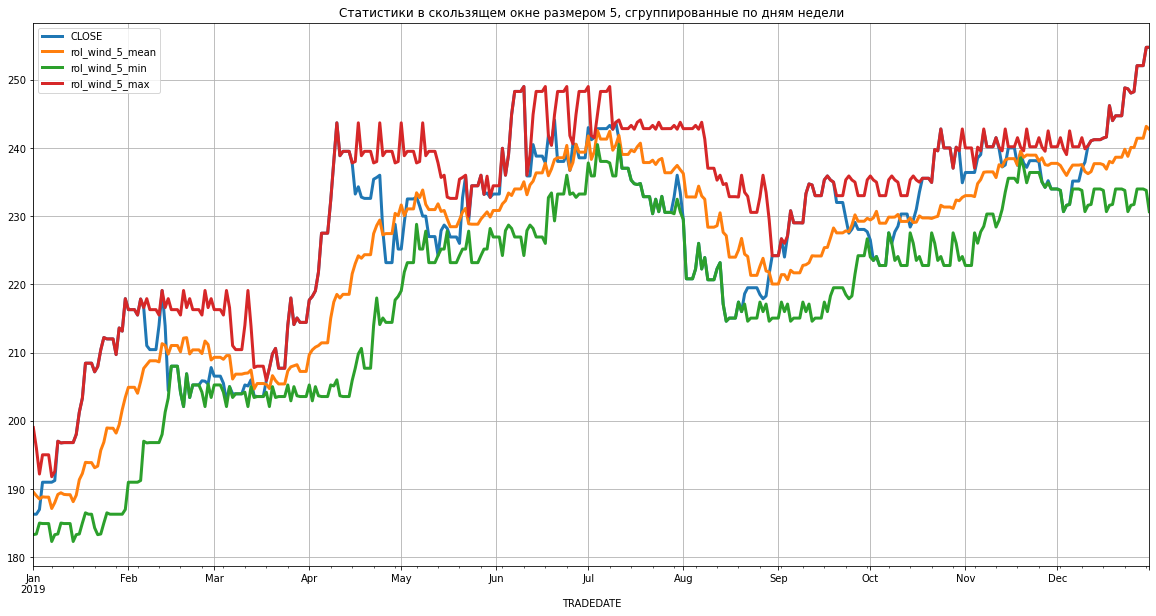

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
params = {'ax': ax, 'linewidth': 3}
interval = '2019'

df.loc[interval, 'CLOSE'].plot(**params)
df.loc[interval, 'rol_wind_5_mean'].plot(**params)
df.loc[interval, 'rol_wind_5_min'].plot(**params)
df.loc[interval, 'rol_wind_5_max'].plot(**params)
plt.grid(True)
plt.legend()
plt.title('Статистики в скользящем окне размером 5, сгруппированные по дням недели')
plt.show()

In [15]:
# Статистики ['mean', 'median', 'max', 'min', 'std'] в расширяющемся окне,
# сгруппированные по рабочим, праздничным и предпраздничным дням

agg_func_cols = dict(zip(agg_func, ['exp_work_' + x for x in agg_func]))
stats = df.loc[oh_calendar['выходной'] == 0, 'CLOSE'].expanding().aggregate(agg_func)
stats.rename(columns=agg_func_cols, inplace=True)
df = df.merge(stats, on='TRADEDATE', how='left')

agg_func_cols = dict(zip(agg_func, ['exp_holy_' + x for x in agg_func]))
stats = df.loc[oh_calendar['праздник'] == 1, 'CLOSE'].expanding().aggregate(agg_func)
stats.rename(columns=agg_func_cols, inplace=True)
df = df.merge(stats, on='TRADEDATE', how='left')

agg_func_cols = dict(zip(agg_func, ['exp_pre_holy_' + x for x in agg_func]))
stats = df.loc[oh_calendar['предпраздничный рабочий день'] == 1, 'CLOSE'].expanding().aggregate(agg_func)
stats.rename(columns=agg_func_cols, inplace=True)
df = df.merge(stats, on='TRADEDATE', how='left')

df.head(50)

,CLOSE,shift_work_1,shift_work_3,shift_work_5,rol_wind_3_mean,rol_wind_3_median,rol_wind_3_max,rol_wind_3_min,rol_wind_3_std,rol_wind_5_mean,rol_wind_5_median,rol_wind_5_max,rol_wind_5_min,rol_wind_5_std,exp_work_mean,exp_work_median,exp_work_max,exp_work_min,exp_work_std,exp_holy_mean,exp_holy_median,exp_holy_max,exp_holy_min,exp_holy_std,exp_pre_holy_mean,exp_pre_holy_median,exp_pre_holy_max,exp_pre_holy_min,exp_pre_holy_std
TRADEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-25,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.790000,98.790,98.79,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-26,97.20,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.995000,97.995,98.79,97.20,1.124300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-27,96.75,97.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.580000,97.200,98.79,96.75,1.071774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-28,98.59,96.75,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.832500,97.895,98.79,96.75,1.010359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-29,98.76,98.59,97.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.018000,98.590,98.79,96.75,0.968334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-30,98.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,98.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-01,98.07,98.76,96.75,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.026667,98.330,98.79,96.75,0.866364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-02,98.93,98.07,98.59,97.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.155714,98.590,98.93,96.75,0.861430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


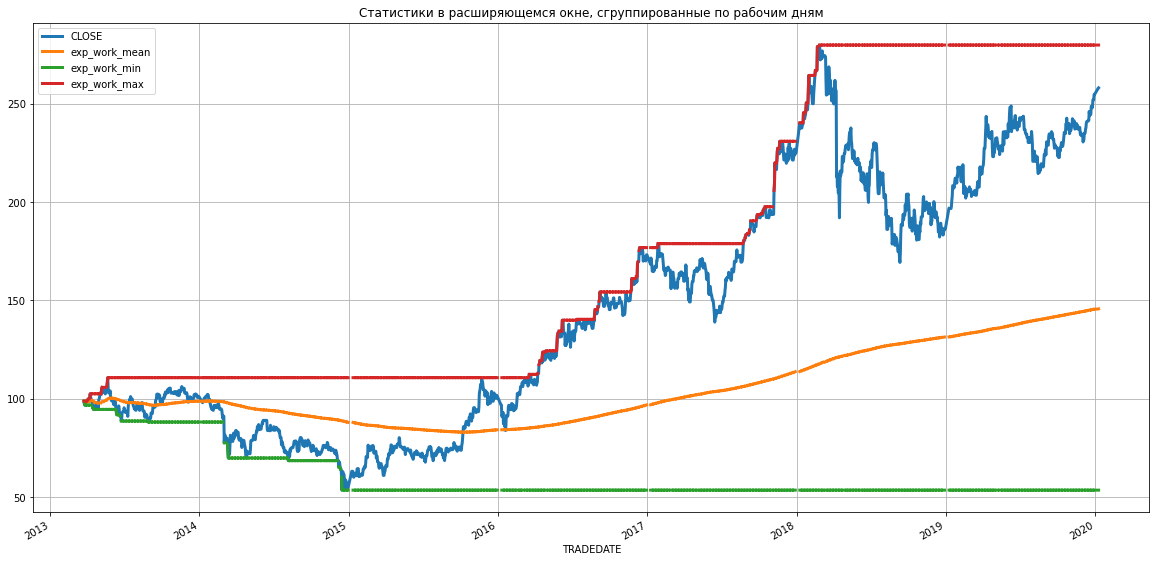

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
params = {'ax': ax, 'linewidth': 3}
interval = oh_calendar['праздник'] == 0

df.loc[interval, 'CLOSE'].plot(**params)
df.loc[interval, 'exp_work_mean'].plot(**params)
df.loc[interval, 'exp_work_min'].plot(**params)
df.loc[interval, 'exp_work_max'].plot(**params)
plt.grid(True)
plt.legend()
plt.title('Статистики в расширяющемся окне, сгруппированные по рабочим дням')
plt.show()

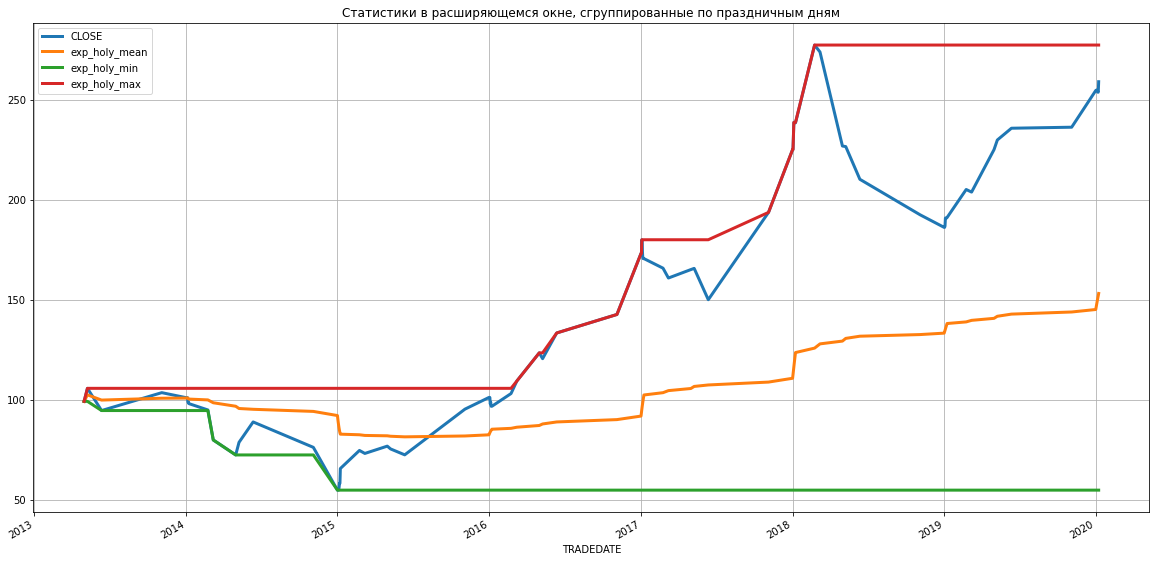

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
params = {'ax': ax, 'linewidth': 3}
interval = oh_calendar['праздник'] == 1

df.loc[interval, 'CLOSE'].plot(**params)
df.loc[interval, 'exp_holy_mean'].plot(**params)
df.loc[interval, 'exp_holy_min'].plot(**params)
df.loc[interval, 'exp_holy_max'].plot(**params)
plt.grid(True)
plt.legend()
plt.title('Статистики в расширяющемся окне, сгруппированные по праздничным дням')
plt.show()

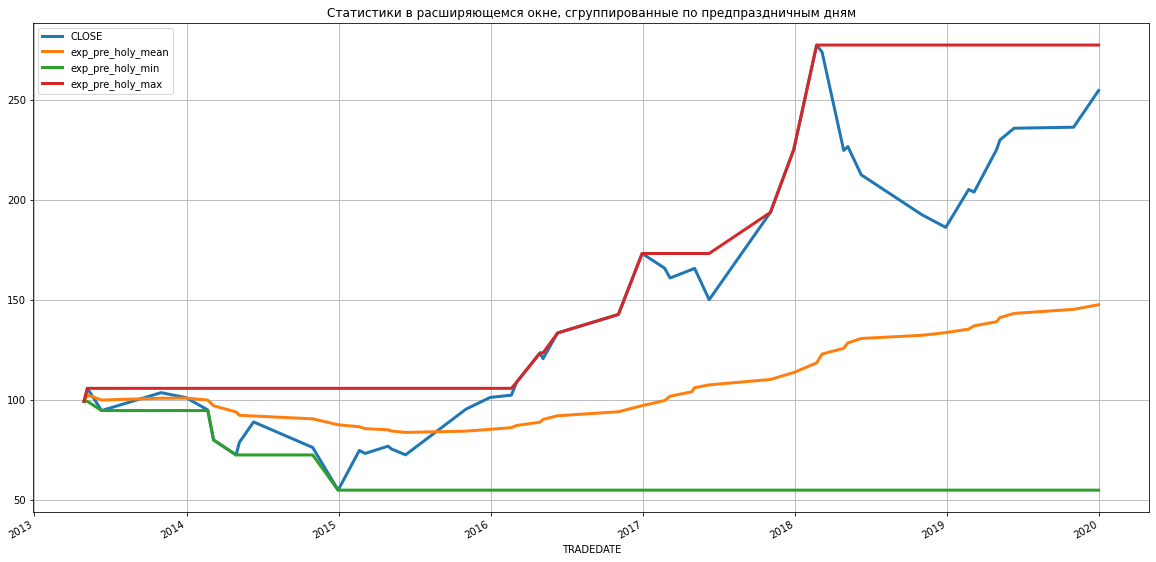

In [18]:
fig, ax = plt.subplots(figsize=(20, 10))
params = {'ax': ax, 'linewidth': 3}
interval = oh_calendar['предпраздничный рабочий день'] == 1

df.loc[interval, 'CLOSE'].plot(**params)
df.loc[interval, 'exp_pre_holy_mean'].plot(**params)
df.loc[interval, 'exp_pre_holy_min'].plot(**params)
df.loc[interval, 'exp_pre_holy_max'].plot(**params)
plt.grid(True)
plt.legend()
plt.title('Статистики в расширяющемся окне, сгруппированные по предпраздничным дням')
plt.show()

In [19]:
df = df.merge(oh_calendar, on='TRADEDATE', how='left')
df

,CLOSE,shift_work_1,shift_work_3,shift_work_5,rol_wind_3_mean,rol_wind_3_median,rol_wind_3_max,rol_wind_3_min,rol_wind_3_std,rol_wind_5_mean,rol_wind_5_median,rol_wind_5_max,rol_wind_5_min,rol_wind_5_std,exp_work_mean,exp_work_median,exp_work_max,exp_work_min,exp_work_std,exp_holy_mean,exp_holy_median,exp_holy_max,exp_holy_min,exp_holy_std,exp_pre_holy_mean,exp_pre_holy_median,exp_pre_holy_max,exp_pre_holy_min,exp_pre_holy_std,выходной,праздник,предпраздничный рабочий день,последний день месяца,последний рабочий день месяца,пн,вт,ср,чт,пт,сб,вс,январь,февраль,март,апрель,май,июнь,июль,август,сентябрь,октябрь,ноябрь,декабрь,Предновогодний выходной день
TRADEDATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-03-25,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.790000,98.790,98.79,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-26,97.20,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.995000,97.995,98.79,97.20,1.124300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-27,96.75,97.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.580000,97.200,98.79,96.75,1.071774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-28,98.59,96.75,98.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.832500,97.895,98.79,96.75,1.010359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2013-03-29,98.76,98.59,97.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.018000,98.590,98.79,96.75,0.968334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-06,253.90,NaN,NaN,NaN,252.483333,253.90,254.75,248.80,3.218048,247.188,248.80,254.75,237.04,7.757897,NaN,NaN,NaN,NaN,NaN,151.060106,155.555,277.49,54.9,66.319354,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-07,253.90,NaN,NaN,NaN,252.440000,253.90,254.75,248.67,3.292461,247.366,248.67,254.75,237.91,7.442777,NaN,NaN,NaN,NaN,NaN,152.142632,160.980,277.49,54.9,66.804143,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-08,259.15,NaN,NaN,NaN,253.980000,254.75,259.15,248.04,5.594882,249.692,248.04,259.15,240.32,7.378934,NaN,NaN,NaN,NaN,NaN,153.257292,163.090,277.49,54.9,67.343104,NaN,NaN,NaN,NaN,NaN,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
